# Recommendation System for Amazon Clothing Products
---
## 5. Collaborative Recommendation System 

*Author*: Mariam Elsayed

*Contact*: mariamkelsayed@gmail.com

*Notebook*: 5 of 5

*Previous Notebook*: `content_rec.ipynb`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD

from surprise import accuracy
from surprise.model_selection import train_test_split

## Table of Contents

* [Introduction](#intro)

* [Loading the Data](#loading)

* [Collaborative Recommendation Systems](#colab)

    * [Creating User-Item Utility Matrix](#matrix)

    * [Using FunkSVD](#funksvd)

* [Conclusion](#conc)

## Introduction <a class="anchor" id="intro"></a>

A collaborative recommendation system relies on recommending products a similar user has liked. This

## Loading Data

In [2]:
# Loading 
reviews_df = pd.read_csv('Data/reviews_cleaned.csv')

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639572 entries, 0 to 5639571
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   vote        int64 
 2   reviewTime  object
 3   reviewerID  object
 4   asin        object
 5   style       object
 6   reviewText  object
 7   summary     object
dtypes: int64(2), object(6)
memory usage: 344.2+ MB


### Preparing Data 

Collaborative recommendation systems rely on reviewers who have reviewed other items, so let's filter for reviews made by reviewers who have written at least 50 reviews.

In [4]:
#reviews_df_mt50 = reviews_df.groupby('reviewerID').filter(lambda x:x['overall'].count() >= 50)

In [5]:
#reviews_df_mt50

In [6]:
#reviews_df_mt50_cols = reviews_df_mt50[['asin', 'reviewerID', 'overall']]

In [7]:
#reviews_df_mt50_cols.info()

In [4]:
reviews_df_cols = reviews_df[['asin', 'reviewerID', 'overall']]

In [5]:
reviews_df_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639572 entries, 0 to 5639571
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   asin        object
 1   reviewerID  object
 2   overall     int64 
dtypes: int64(1), object(2)
memory usage: 129.1+ MB


In [6]:
reviews_df_cols

,asin,reviewerID,overall
0,5120053890,A1SUF16ND4E9C6,5
1,5120053890,A5D7DXJSJB4D2,5
2,5120053890,A3HBX14MPC46LY,5
3,5120053890,A2C4SF85GXJDRB,5
4,5120053890,A1S8FSYVCLZCAY,5
...,...,...,...
5639567,B01HJHR8A6,A3SLLSQUXREDRN,5
5639568,B01HJHR8A6,A1K36IPP1IDPR3,5
5639569,B01HJHR8A6,A2ENZHR6N5WV6S,4
5639570,B01HJHR8A6,ALOIB506XZBQP,2


## Collaborative Recommendation System <a class="anchor" id="colab"></a>

A collaborative recommendation system finds similar users and recommends what other similar users like as well. 

### Creating User-Item Utility Matrix <a class="anchor" id="utility"></a>

The user-item utility matrix is a table that shows the rating a user gave on a product. If the user did not review a product, then the value is null. T 
We can use this table to find similar users and make collaborative recommendations baised on that, however the matrix we have is too sparse.

In [26]:
# making user-item utility matrix
R_df = reviews_df_cols.pivot_table(values='overall', index='reviewerID', columns='asin')

c:\Users\maria\anaconda3\envs\capstone\lib\site-packages\pandas\core\reshape\reshape.py:130: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

In [11]:
R_df

asin,B0000ANHT7,B0001YRE04,B0001YRFS0,B00028AVDG,B00028AZ6E,B0002LT6RU,B0002MFOPM,B0002NYQO6,B0002NZ28A,B0002PNJWE,...,B01H2B6TYK,B01H3EALTK,B01H3EB71G,B01H6ZS2FQ,B01H7EO598,B01H87VJPW,B01HAUL8HG,B01HFJOM70,B01HGII8P2,B01HHAT9M0
reviewerID,,,,,,,,,,,,,,,,,,,,,
A1J7RPYGVGH5O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1P62PK6QVH8LV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
A1YAP371XWJC6L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2ENL8SWTHBOP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
A34SPFZIHHN907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3EGFSX6FQHWQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
A3G5KDMFNRUXHB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3J5XBZ9ZNEZOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3JBQHQZEZPQK4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
products_1st_user_rated = ~R_df.iloc[10, :].isna()
products_2nd_user_rated = ~R_df.iloc[16, :].isna()

products_both_users_rated = products_1st_user_rated & products_2nd_user_rated
print(products_both_users_rated.sum())

1


In [13]:
R_df.sum(axis=1).sort_values(ascending=False)

reviewerID
ALFRMOGTO1K4M     484.0
A3W5A9X3HHACQT    416.0
AENH50GW3OKDA     324.0
A3LV42NBFM829N    323.0
AQR8WLMVKCE6V     313.0
A3J5XBZ9ZNEZOC    295.0
A1J7RPYGVGH5O3    290.0
AJ7VVCALVT8KP     260.0
AAC2BU2V9X95K     258.0
A3JBQHQZEZPQK4    258.0
AZZXCFBNEWIBQ     247.5
AOTJ1TVF87U4L     245.0
A3MPHEJ0N39W87    238.0
A34SPFZIHHN907    235.0
A3OXB8POGTLMFY    232.0
A2ENL8SWTHBOP2    229.0
A3EGFSX6FQHWQ1    218.0
A3G5KDMFNRUXHB    215.0
A8OYDQ9LKGI5W     214.0
A1YAP371XWJC6L    214.0
A1P62PK6QVH8LV    195.0
dtype: float64

In [14]:
products_1st_user_rated = ~R_df.loc['ALFRMOGTO1K4M'].isna()
products_2nd_user_rated = ~R_df.loc['A1P62PK6QVH8LV'].isna()

products_both_users_rated = products_1st_user_rated & products_2nd_user_rated
print(products_both_users_rated.sum())

1


In [15]:
products_both_users_rated[products_both_users_rated == True]

asin
B007C22YU8    True
dtype: bool

### Using FunkSVD<a class="anchor" id="funksvd"></a>

FunkSVD works around the user-utility matrix mostly being null by ignoring these missing values and compute the latent factors with values that are known.

In [7]:
reviews_df_simple = reviews_df[['reviewerID', 'asin', 'overall']].sort_values(by=['reviewerID', 'asin', 'overall'])
reviews_df_simple 

,reviewerID,asin,overall
5306593,A0003492LQH8LJXPWDMZ,B00I95O5N6,3
3182356,A0003492LQH8LJXPWDMZ,B00KRMS12A,3
4086833,A0003492LQH8LJXPWDMZ,B00XWE5TB6,1
1876799,A001170867ZBE9FORRQL,B0076RL90K,5
1986711,A001170867ZBE9FORRQL,B0085F7MH6,4
...,...,...,...
526792,AZZZV0D9D5V05,B000WTOCS0,5
4988708,AZZZV0D9D5V05,B01GEYRYKE,5
1270636,AZZZY1W55XHZR,B003DTMPIA,5
1980976,AZZZY1W55XHZR,B00842Z7IG,1


In [8]:
my_dataset = Dataset.load_from_df(reviews_df_simple, Reader(rating_scale=(1, 5)))
my_train_dataset = my_dataset.build_full_trainset()

In [9]:
my_train_dataset

In [10]:
my_algorithm = FunkSVD(n_factors=20, n_epochs=100, lr_all=0.1, biased=False, verbose=0)

my_algorithm.fit(my_train_dataset)

In [11]:
U = my_algorithm.pu     # user matrix
P = my_algorithm.qi.T   # products matrix

In [13]:
P

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [16]:
print(P.shape, 'P shape')
print(U.shape, 'U shape')

(10, 148027) P shape
(1176126, 10) U shape


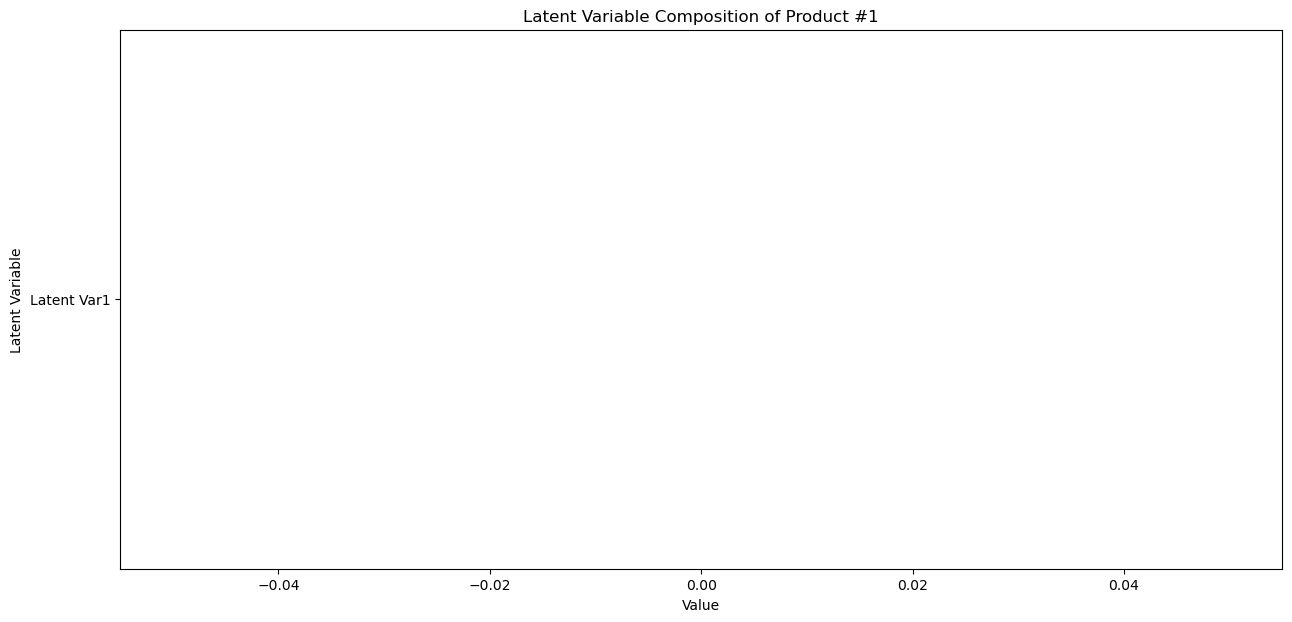

In [17]:
first_product = P[:, 0]

plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_product)+1)], first_product)
plt.title("Latent Variable Composition of Product #1")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [18]:
inner_user_id = my_train_dataset.to_inner_uid('A3FU9ZL7Z2R4PV') # find the inner representation of user 1
user_profile = U[inner_user_id]
user_profile

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [19]:
my_train_datasetx, my_test_dataset = train_test_split(my_dataset, test_size=0.5)

predictions = my_algorithm.test(my_test_dataset)

In [20]:
# Root Mean Squared Error
RMSE = accuracy.rmse(predictions, verbose=False)
print(RMSE)

1.3238663104423076


In [21]:
# Mean Squared Error
MSE = accuracy.mse(predictions, verbose=False)
print(MSE)

1.7526220079241286


In [22]:
# Mean Average Error
MAE = accuracy.mae(predictions, verbose=False)
print(MAE)

0.7066823726654748


In [23]:
# FCP - Fraction of Concordant Pairs, the fraction of pairs whose relative ranking order is correct
FCP = accuracy.fcp(predictions, verbose=False)
print(FCP) 

0.0


The error is not the worst and atleast we are getting some fraction of concordant pairs.

Now let's increase the number of latent variables and see if this effects the accuracy scores.

In [24]:
my_algorithm = FunkSVD(n_factors=30, n_epochs=100, lr_all=0.1, biased=False, verbose=0)

my_algorithm.fit(my_train_dataset)

In [25]:
U = my_algorithm.pu
P = my_algorithm.qi.T

In [26]:
print(P.shape, 'P shape')
print(U.shape, 'U shape')

(30, 148027) P shape
(1176126, 30) U shape


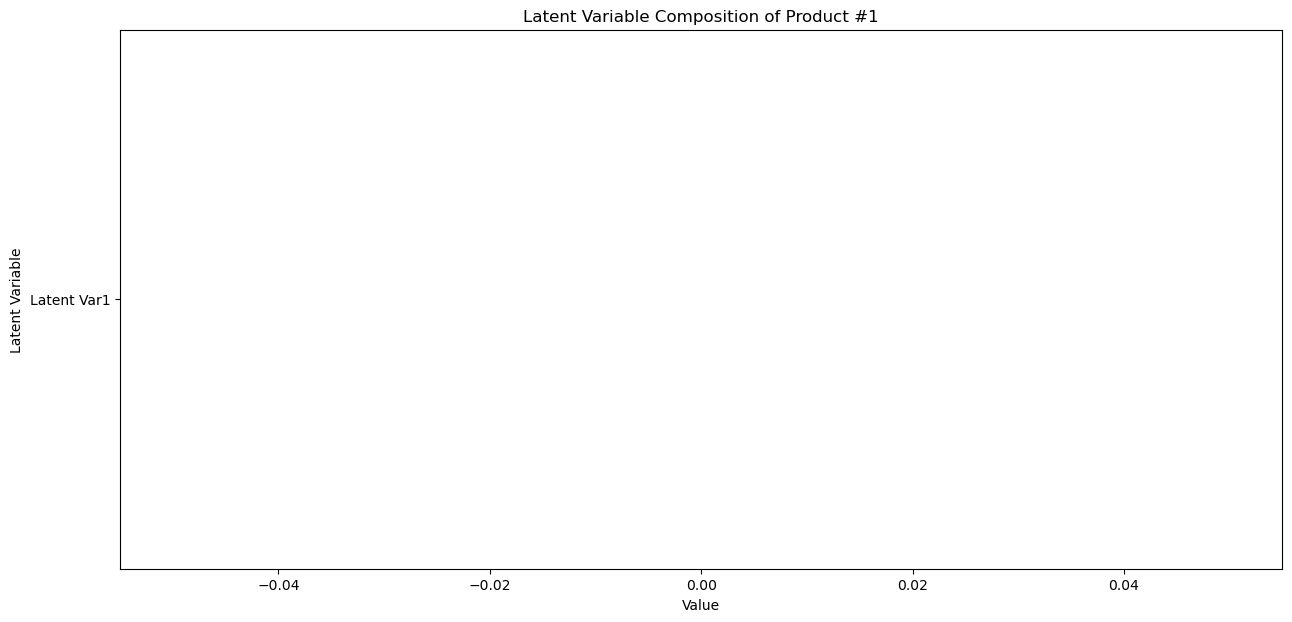

In [27]:
first_product = P[:, 0]

plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_product)+1)], first_product)
plt.title("Latent Variable Composition of Product #1")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [28]:
inner_user_id = my_train_dataset.to_inner_uid('A3FU9ZL7Z2R4PV') # find the inner representation of user 1
user_profile = U[inner_user_id]
user_profile

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [29]:
my_train_datasetx, my_test_dataset = train_test_split(my_dataset, test_size=0.5)

predictions = my_algorithm.test(my_test_dataset)

In [30]:
RMSE = accuracy.rmse(predictions, verbose=False)
print(RMSE)

1.3230764996835331


In [31]:
MSE = accuracy.mse(predictions, verbose=False)
print(MSE)

1.75053142401483


In [32]:
MAE = accuracy.mae(predictions, verbose=False)
print(MAE)

0.706184831021554


In [33]:
# FCP - Fraction of Concordant Pairs, the fraction of pairs whose relative ranking order is correct

FCP = accuracy.fcp(predictions, verbose=False)
print(FCP) 

0.0


Increasing the number of latent variables does not make a difference with improving the error or the fraction of concordant pairs.

## Conclusion <a class="anchor" id="conc"></a>

Using FunkSVD, a collaborative recommendation system was created with the fraction of pairs whose relative ranking order being correct at 0.31. 

In [ ]:
asins = prod

In [39]:
reviews_df_simple_new = reviews_df_simple.tail(10000)

In [40]:
ratings_matrix = reviews_df_simple_new.pivot_table(values='overall', index='reviewerID', columns='asin', fill_value=0).T
ratings_matrix

reviewerID,AZR2XCO2O7T7J,AZR2Y3TW7MARC,AZR31ZSFHTB1Z,AZR34YEYD9UZY,AZR3B0FV3RHNQ,AZR3JA8ZVH819,AZR3VCTBUM5FR,AZR3W7EFOS1F1,AZR3WGW3JSDNI,AZR3XPTOURPKC,...,AZZYJH0XNZ896,AZZYUA6JI1MO0,AZZYVURSF9KK6,AZZYW4YOE1B6E,AZZZ8I44ND9GG,AZZZHECGS8QGE,AZZZJJPHNUQ1T,AZZZMCJO078D2,AZZZV0D9D5V05,AZZZY1W55XHZR
asin,,,,,,,,,,,,,,,,,,,,,
8742240611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00006XXGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000072UMN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000072US4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00007GDDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B01HHZ5LZE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B01HIACCKA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B01HJ21R8A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.decomposition import TruncatedSVD
my_SVD = TruncatedSVD(n_components=10)
decomposed_matrix = my_SVD.fit_transform(ratings_matrix)

In [42]:
correlation_matrix = np.corrcoef(decomposed_matrix)

In [52]:
i = 'B01HJ21R8A'

product_names = list(ratings_matrix.index)
product_ID = product_names.index(i)
product_ID

7657

In [44]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(7660,)

In [45]:
recommend_B000087VAL = list(ratings_matrix.index[correlation_product_ID > 0.65])
recommend_B000087VAL[0:10]

['B00006XXGO',
 'B000072UMN',
 'B000072US4',
 'B0000WL0XY',
 'B0001YSBOC',
 'B0007Z2MLS',
 'B00093DAOQ',
 'B000ARPN4G',
 'B000BJSTEE',
 'B000BRETA4']

In [47]:
products_df = pd.read_csv('Data/products_cleaned.csv')

In [48]:
products_df

,category,description,title,brand,rank,asin,imageURL,price,maincat_Luggage & Travel Gear,maincat_Backpacks,...,subcat_Shoes,subcat_Handbags & Wallets,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street"
0,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,3994472,0204444454,['https://images-na.ssl-images-amazon.com/imag...,70.00,True,True,...,False,False,False,False,False,False,False,False,False,False
1,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,635761,0204444403,['https://images-na.ssl-images-amazon.com/imag...,65.99,True,True,...,False,False,False,False,False,False,False,False,False,False
2,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",Brand New. Hat Centre Length: adult about 8cm...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,5061041,0206313535,['https://images-na.ssl-images-amazon.com/imag...,18.99,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"['Clothing, Shoes & Jewelry', 'Women', 'Clothi...",Please allow 1-2cm dimension deviation. 100% b...,bettyhome Womens Lace Short Sleeves Top Printi...,bettyhome,10635107,0206335962,['https://images-na.ssl-images-amazon.com/imag...,23.99,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",2 Way Shoulder Handle Polyester Canvas Boston ...,Japan Anello LARGE CAMO 2 Way Unisex Shoulder ...,Anello,1615335,024444448X,['https://images-na.ssl-images-amazon.com/imag...,65.33,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678727,"['Clothing, Shoes & Jewelry', 'Men', 'Accessor...",Get maximum protection from the elements. Clif...,Kaenon Cliff Sunglasses - Select Color,Kaenon,1908928,B01HJH6SA2,['https://images-na.ssl-images-amazon.com/imag...,199.00,False,False,...,False,False,False,False,False,False,False,False,False,False
678728,"['Clothing, Shoes & Jewelry', 'Men', 'Shoes', ...",A classic wingtip with a subtle twist that cov...,Deer Stags Men's Hampden Oxford,Unknown,956501,B01HJH7W0W,['https://images-na.ssl-images-amazon.com/imag...,52.38,False,False,...,True,False,False,False,False,False,False,False,False,False
678729,"['Clothing, Shoes & Jewelry', 'Women', 'Clothi...",Our classy but sexy strappy sheath cocktail wi...,Laundry by Shelli Segal Women's Fitted Strappy...,Unknown,3633844,B01HJI0G5Y,['https://images-na.ssl-images-amazon.com/imag...,18.99,False,False,...,False,False,False,False,False,False,False,False,False,False
678730,"['Clothing, Shoes & Jewelry', 'Baby', 'Baby Gi...",Size Length Hip*2 Age Advice 70 39.5 CM 30 CM ...,Newborn Baby Girl Bodysuit Lace Floral Romper ...,Hotone,1671980,B01HJHR8A6,['https://images-na.ssl-images-amazon.com/imag...,4.99,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
products_df.loc[products_df['asin'] == 'B000072UMN']

,category,description,title,brand,rank,asin,imageURL,price,maincat_Luggage & Travel Gear,maincat_Backpacks,...,subcat_Shoes,subcat_Handbags & Wallets,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street"
